In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data into a Pandas dataframe
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["credit-card-holder-data.csv"]))

Saving credit-card-holder-data.csv to credit-card-holder-data.csv


In [3]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df = df.drop(columns=[df.columns[0]])

In [10]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 17 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

In [8]:
df.info()
# we see that every features are quantitative, and we have no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# EDA

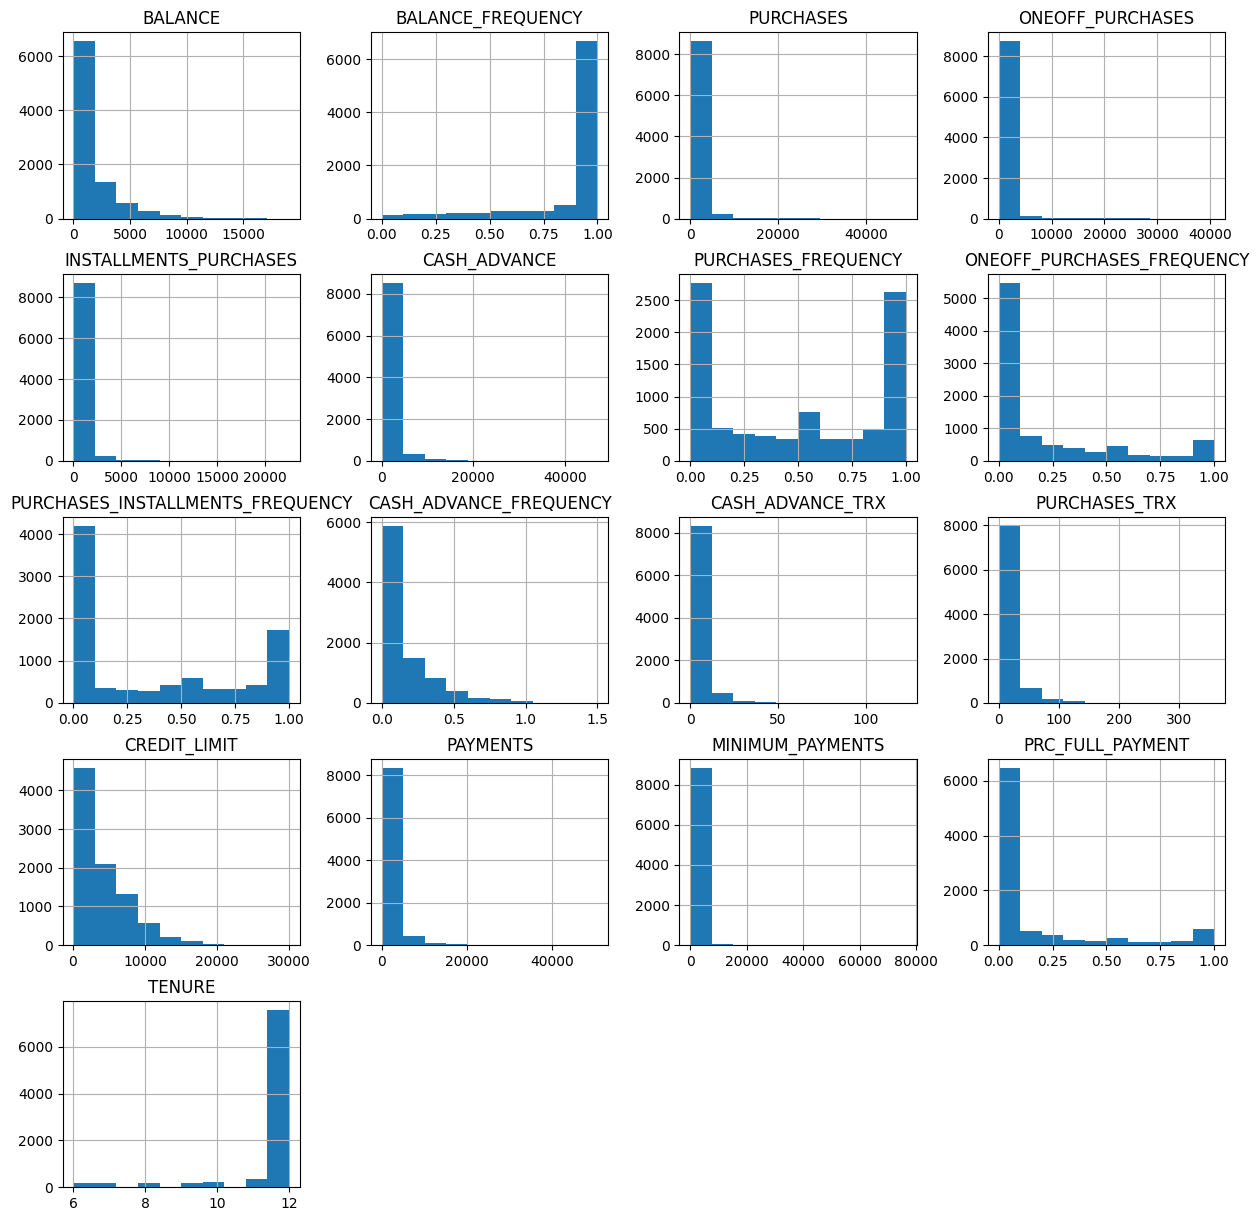

In [12]:
# Plot histograms of all data features
df.hist(figsize=(15, 15))
plt.show()

<Axes: >

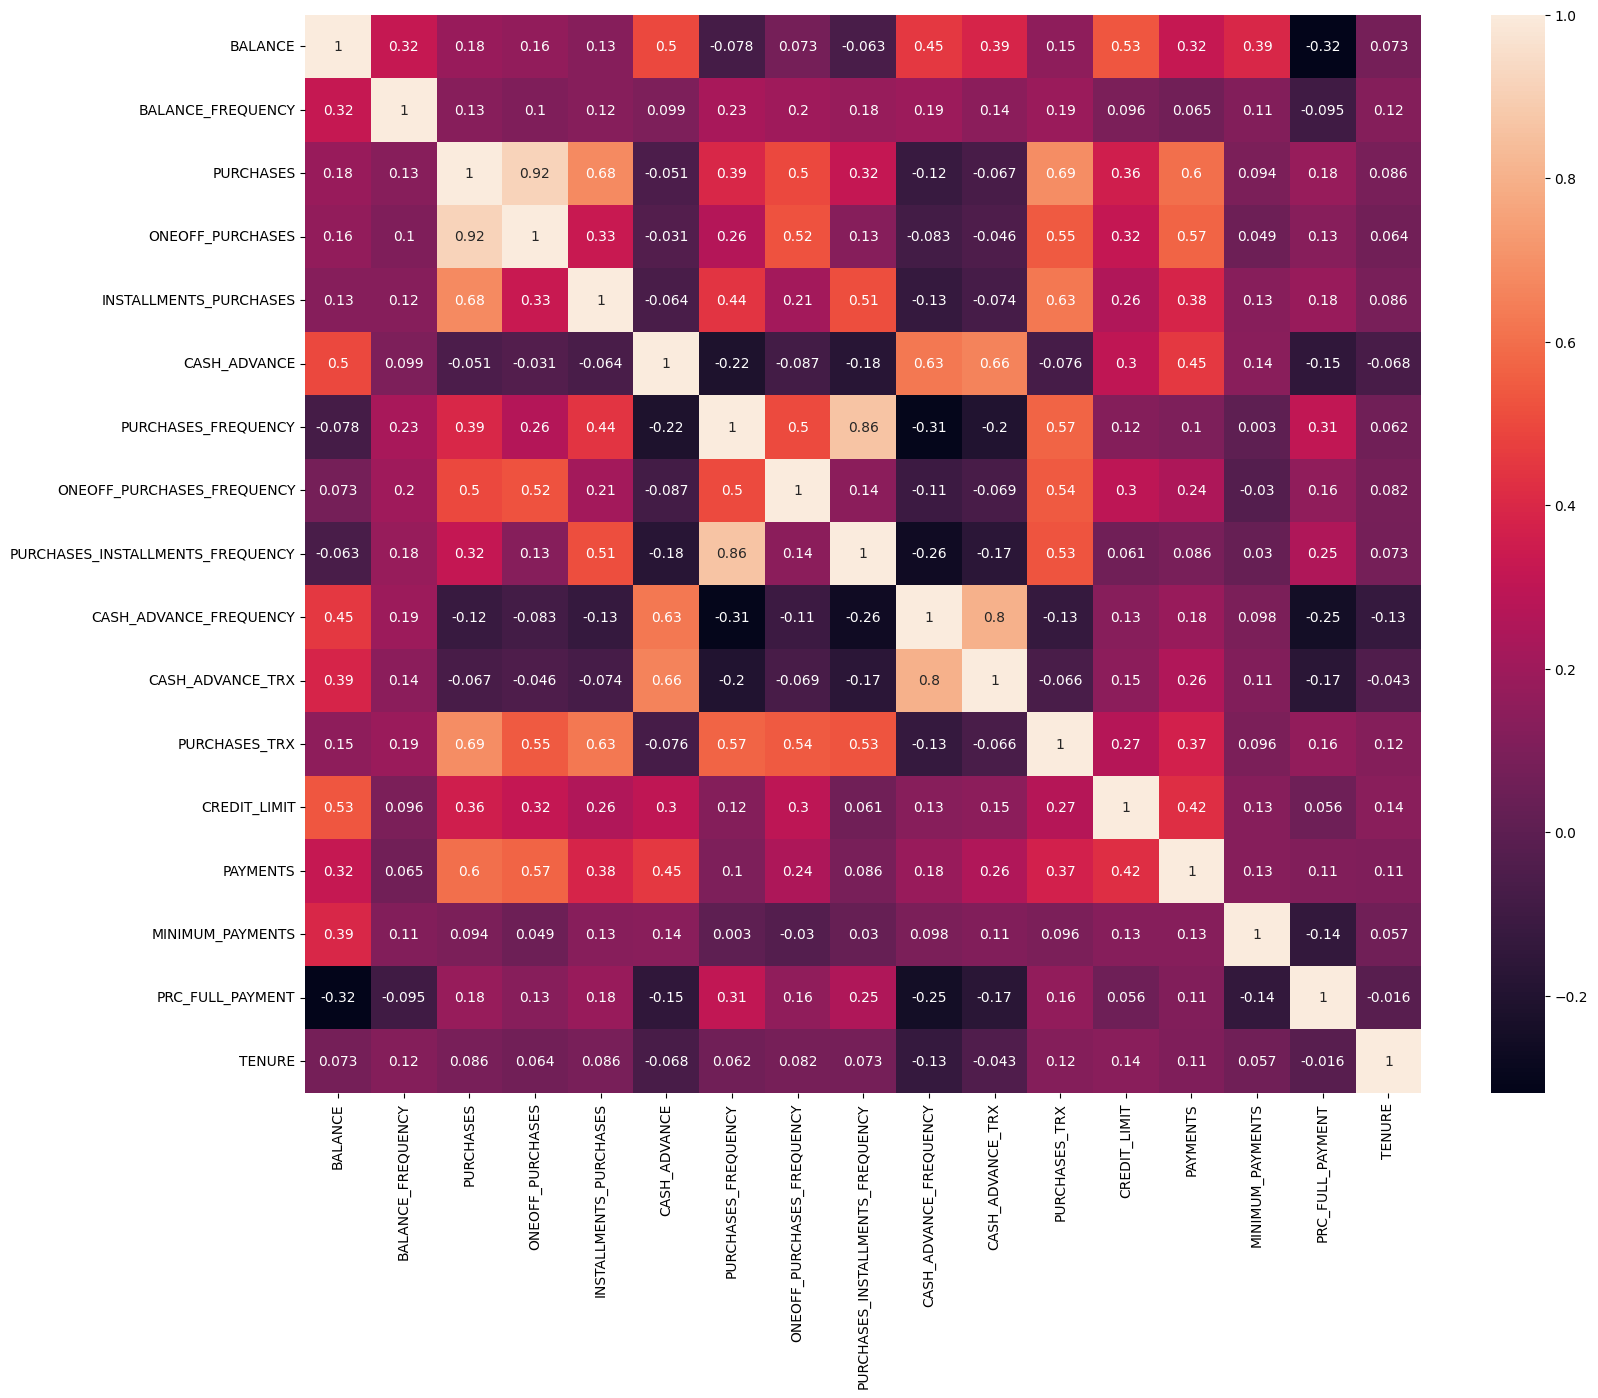

In [18]:
# Polt the correlation heatmap between pairs of features.
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True)

# Observation: PURCHASES & ONEOFF_PURCHASES, PURCHASES & INSTALLMENTS_PURCHASES have high positive correaltion, this might because PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES.
# This situation also happens with PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCE & CASH_ADVANCE_TRX
# -> PCA here?

# Train model

In [19]:
# Make a copy of the data
data = df.copy()

In [20]:
# Import StandardScaler to standardize the data features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (calculate mean and standard deviation) and transform (substract mean and divide by std) the data
scaled_data = scaler.fit_transform(data.values)

In [21]:
# Install yellowbrick library
# !pip install yellowbrick

# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

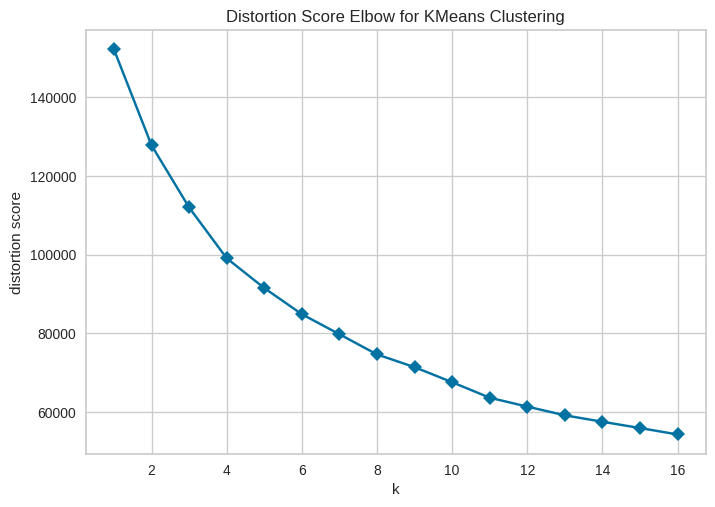

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Identify a good number of clusters between 1 and 17, do not show the fitting time and do not suggest elbow value.
elbow_method = KElbowVisualizer(KMeans(), k=(1,17), timings=False, locate_elbow=False)
elbow_method.fit(scaled_data)
elbow_method.show()

# guess K = 4?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

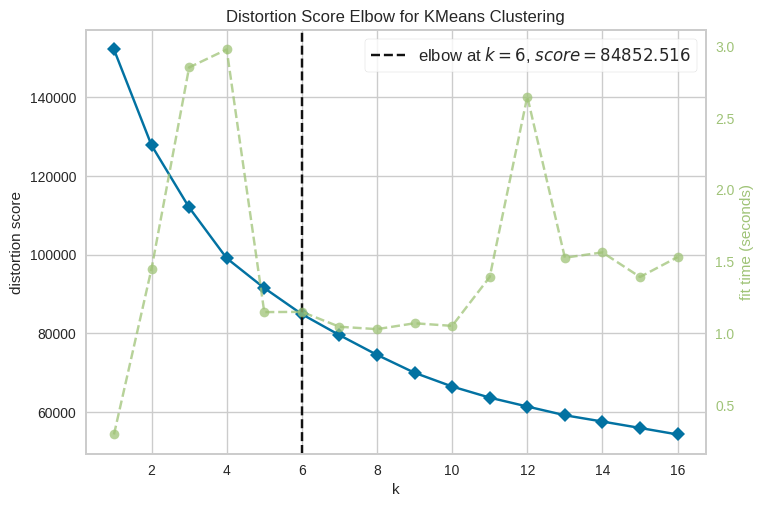

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Identify a good number of clusters between 1 and 17, do show the fitting time and suggest elbow value.
elbow_method = KElbowVisualizer(KMeans(), k=(1,17), timings=True, locate_elbow=True)
elbow_method.fit(scaled_data)
elbow_method.show()

So our guess that K = 4 is incorrect. Instead, by turning the locate_elbow to True, we found K = 6 is the best value for K, according to the “knee point detection algorithm”, which chooses the point that has the steepest rise in the curve.

Besides, by using timings =  True, we found that the running time for k = 5, 6,..., 10 are quite similar. So instead of choosing k = 6, choosing k = 7, 8, 9, 10 are also suitable (?). However, decreasing the disortion score does not strictly imply that we have a better model. This is because the more clusters we have, the more treatments we need to apply for these clusters. And sometimes, the differences among these many clusters might not be important enough such that we need to spend more effort to deal with them. So, I believe that to choose a (subjective) optimal value for K, we will need to use the domain knowledge in the problem and decide case by case.

In our assignment, since I have no knowledge on the problem, I will simply choose K = 6 as the model suggested.

In [26]:
# Let us pick six clusters
kmeans_model = KMeans(n_clusters = 6)

# Run K-means algorithm with K = 6
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [27]:
# Show cluster label of training data samples
kmeans_model.labels_

array([0, 3, 2, ..., 5, 0, 0], dtype=int32)

In [28]:
# Make cluster label prediction of new data samples (assume here we use scaled_data as tes data samples).
kmeans_model.predict(scaled_data)

array([0, 3, 2, ..., 5, 0, 0], dtype=int32)

In [29]:
# Show location of cluster centroids
kmeans_model.cluster_centers_

array([[-0.01017065,  0.37157139, -0.34530901, -0.2238893 , -0.40505394,
        -0.07981668, -0.82680136, -0.33583488, -0.77106757,  0.13344263,
        -0.02712305, -0.47079796, -0.33115416, -0.26135484, -0.03096167,
        -0.45071075, -0.00925885],
       [-0.69808345, -2.12195727, -0.3129182 , -0.23091847, -0.31555317,
        -0.30784787, -0.55953232, -0.41850675, -0.4647188 , -0.48568753,
        -0.35917666, -0.42561905, -0.20907025, -0.22122484, -0.25609567,
         0.26217199, -0.16410052],
       [ 0.14119765,  0.42706971,  0.93018647,  0.87913198,  0.58425299,
        -0.30891278,  1.08742339,  1.83932057,  0.54130905, -0.40557753,
        -0.31833017,  1.18553888,  0.69581649,  0.38153091, -0.02266891,
         0.43734059,  0.27130475],
       [ 1.59397642,  0.37670295, -0.20363236, -0.14834967, -0.20903513,
         1.95122838, -0.44788948, -0.18265989, -0.40529825,  1.90259986,
         1.85843051, -0.24329212,  0.96244075,  0.77843212,  0.5136878 ,
        -0.39115607

# Dimensionality reduction

In [30]:
# Import PCA library
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=17)

In [31]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[4.63982474e+00 3.45172419e+00 1.49480352e+00 1.27173785e+00
 1.06479362e+00 9.77645154e-01 8.30922729e-01 7.23853420e-01
 6.50969490e-01 5.23659568e-01 4.03267614e-01 3.01551195e-01
 2.42530713e-01 2.06975882e-01 1.72227523e-01 4.54007901e-02
 1.16501010e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]

Cummulative sum of all ratios :
[0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


## 3-dimensional PCA

In [32]:
# We test the three most important principal components as they cover 56.4% of the data variance.
pca3 = PCA(n_components=3)

# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

In [34]:
# Show the data frame
pca3_df.head()

,pca_1,pca_2,pca_3
0,-1.682219,-1.076451,0.488402
1,-1.138292,2.506483,0.601043
2,0.969682,-0.383523,0.102506
3,-0.873626,0.043167,1.460056
4,-1.599433,-0.688583,0.365009


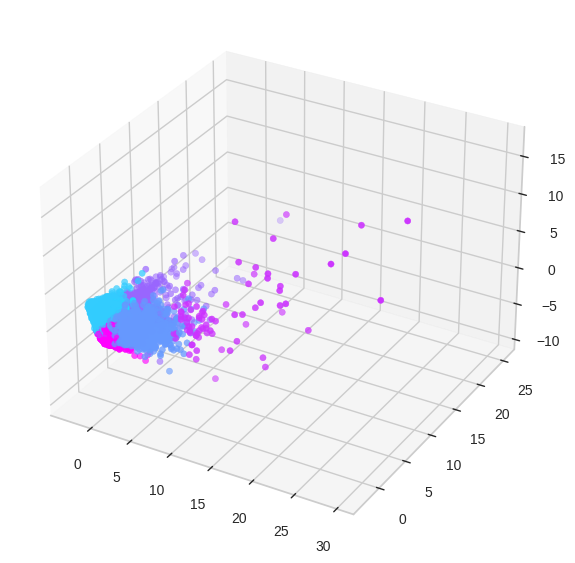

In [35]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

Since our K is large, let's create an interactiv plot to get a better visualization

In [47]:
import plotly.express as px

# Create a DataFrame with PCA components and KMeans labels
pca3_df['labels'] = kmeans_model.labels_

# Create an interactive 3D scatter plot
fig = px.scatter_3d(pca3_df, x='pca_1', y='pca_2', z='pca_3', color='labels', color_continuous_scale='Viridis',
                    labels={'labels': 'Cluster'})
fig.update_layout(scene=dict(
                    xaxis_title='PCA 1',
                    yaxis_title='PCA 2',
                    zaxis_title='PCA 3'))
fig.show()


## 2-dimensional PCA

In [48]:
# We test the two most important principal components as they cover 47.6% of the data variance.
pca2 = PCA(n_components=2)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

In [49]:
pca2_df.head()

,pca_1,pca_2
0,-1.682220,-1.076447
1,-1.138294,2.506484
2,0.969684,-0.383533
3,-0.873627,0.043173
4,-1.599433,-0.688579


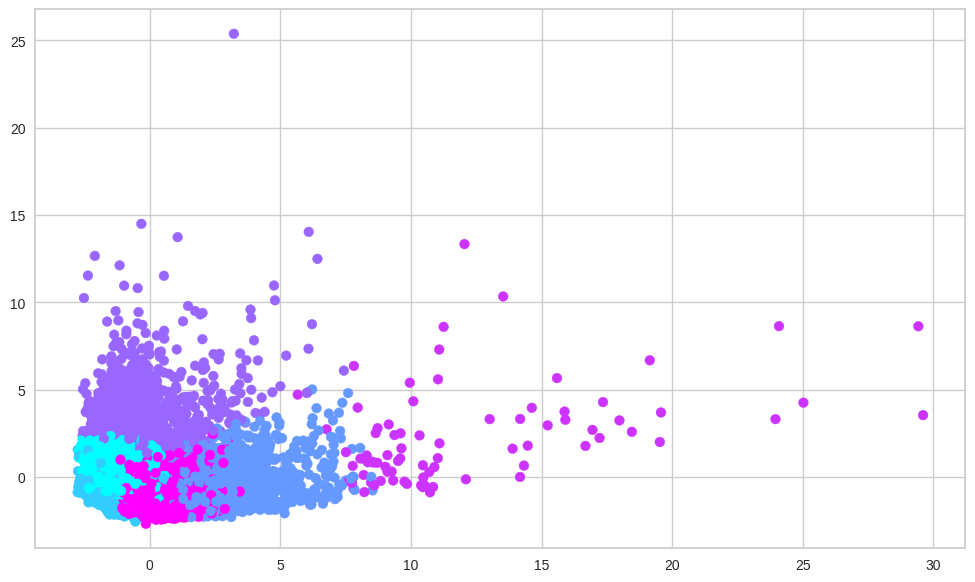

In [50]:
# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=kmeans_model.labels_, cmap="cool")
plt.show()

## 3-dimensional T-SNE

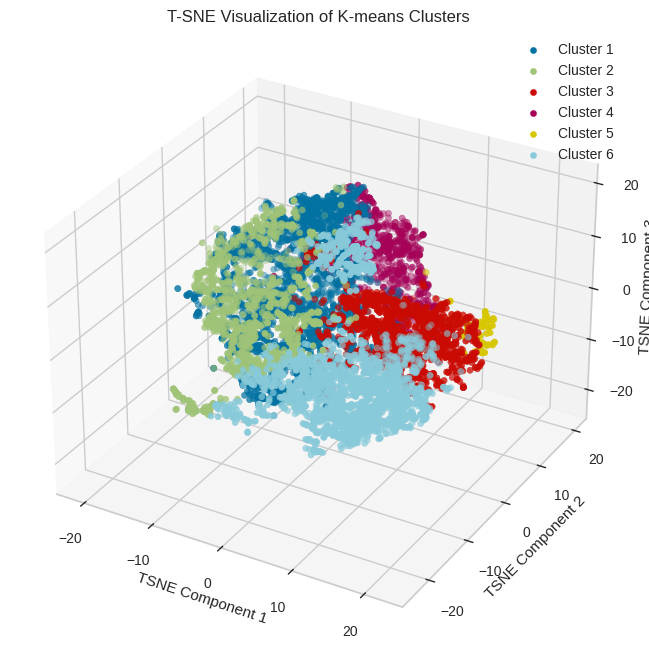

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Transform the data using T-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Plot the transformed data points with cluster labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(6):
    ax.scatter(tsne_data[kmeans_model.labels_ == i, 0],
               tsne_data[kmeans_model.labels_ == i, 1],
               tsne_data[kmeans_model.labels_ == i, 2],
               label=f'Cluster {i+1}')

ax.set_title('T-SNE Visualization of K-means Clusters')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')
ax.legend()
plt.show()


We see that the 3D T-SNE gives a significant better result than 3D PCA.

## 2-dimensional T-SNE

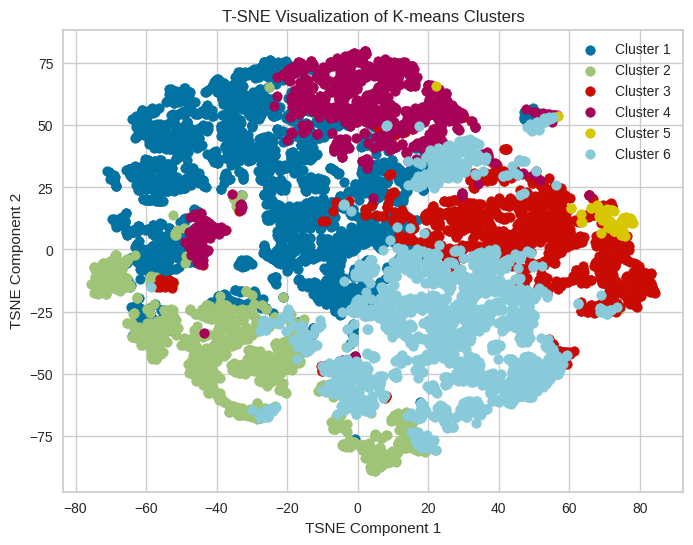

In [59]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Transform the data using T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Plot the transformed data points with cluster labels
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.scatter(tsne_data[kmeans_model.labels_ == i, 0], tsne_data[kmeans_model.labels_ == i, 1], label=f'Cluster {i+1}')
plt.title('T-SNE Visualization of K-means Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend()
plt.show()


The same property also occurs with 2D T-SNE

# Save and load the model

In [51]:
# Save model using pickle library
import pickle
file_name = "model.sav"                              # Path to save the model
pickle.dump(kmeans_model, open(file_name, "wb"))     # Save the model to a pickle file

In [52]:
# Load the saved model using pickle library
file_name = "model.sav"
load_model = pickle.load(open(file_name, "rb"))

In [60]:
# Access cluster information from the loaded model
cluster = load_model.labels_
cluster_0 = np.where(cluster==0)   # indices of data samples in cluster 0
cluster_1 = np.where(cluster==1)   # indices of data samples in cluster 1
cluster_2 = np.where(cluster==2)   # indices of data samples in cluster 2
cluster_3 = np.where(cluster==3)   # indices of data samples in cluster 3
cluster_4 = np.where(cluster==4)   # indices of data samples in cluster 4
cluster_5 = np.where(cluster==5)   # indices of data samples in cluster 5

In [61]:
# Get data samples in cluster 0
data.iloc[cluster_0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12
11,630.794744,0.818182,1492.18,1492.18,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,1055.087681,0.666667,0.00,0.00,0.0,1820.116200,0.000000,0.000000,0.000000,0.333333,2,0,2000.0,54.795084,233.229870,0.00,6
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


# Analyze the cluster samples

In [63]:
# Initialize a dictionary to store samples for each cluster
cluster_samples = {i: [] for i in range(6)}

# Store samples in the dictionary based on their cluster labels
for i in range(len(kmeans_model.labels_)):
    cluster_label = kmeans_model.labels_[i]
    cluster_samples[cluster_label].append(scaled_data[i])

# Convert lists to numpy arrays for easier manipulation
for key, value in cluster_samples.items():
    cluster_samples[key] = np.array(value)

# Analyze features of each cluster
for cluster_label, samples in cluster_samples.items():
    print(f"Cluster {cluster_label + 1}:")
    cluster_mean = np.mean(samples, axis=0)
    cluster_std = np.std(samples, axis=0)
    print("Mean of features:")
    print(cluster_mean)
    print("Standard deviation of features:")
    print(cluster_std)
    print()


Cluster 1:
Mean of features:
[-0.01028117  0.37212093 -0.3453491  -0.22385005 -0.40522052 -0.08171435
 -0.82654828 -0.3356804  -0.77085465  0.131981   -0.02827032 -0.47070505
 -0.33247654 -0.26206957 -0.02988001 -0.45101169 -0.00864091]
Standard deviation of features:
[0.61174919 0.34426498 0.22189251 0.27034148 0.1495569  0.49919331
 0.49262022 0.53974536 0.3115329  0.78741942 0.51763272 0.19410968
 0.67722579 0.3705708  0.72882678 0.21439851 0.99576183]

Cluster 2:
Mean of features:
[-0.6978439  -2.12155348 -0.31303768 -0.23101459 -0.31565922 -0.30691152
 -0.56003745 -0.41870519 -0.46506379 -0.48440278 -0.35781276 -0.42574581
 -0.20932891 -0.22102455 -0.2560149   0.26157114 -0.16598015]
Standard deviation of features:
[0.11096219 0.82567757 0.22524285 0.27074766 0.25912611 0.40337562
 0.62769511 0.42225193 0.63184385 0.37730876 0.32553731 0.18232515
 0.87959967 0.80540333 0.13793032 1.18439387 1.1849584 ]

Cluster 3:
Mean of features:
[ 0.14119765  0.42706971  0.93018647  0.87913198 

We can visualize this result to easier see it as follow

In [62]:
import plotly.express as px
from sklearn.cluster import KMeans


# Assign cluster labels to the data
clusters = pd.DataFrame(scaled_data, columns=data.columns)
clusters['label'] = kmeans_model.labels_

# Calculate cluster centroids
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])

# Plot polar chart
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,
                    height=700, width=1000, title='Cluster Centroids in Polar Coordinates (6 Clusters)')
fig.show()


We have some observations for some clusters as follow:

1. Cluster 1: The mean values of the features are generally around 0, indicating that the cluster is centered around the origin in the feature space.
The standard deviations of the features are relatively moderate, suggesting moderate variability within the cluster.
2. Cluster 3: The mean values of the features are generally positive, indicating that the cluster is skewed towards higher values in the feature space. The standard deviations of the features vary, but some are relatively high, suggesting variability within the cluster.
3. Cluster 6: The mean values of the features are generally moderate, indicating that the cluster is spread across different regions of the feature space.
The standard deviations of the features vary, but some are relatively high, suggesting variability within the cluster.



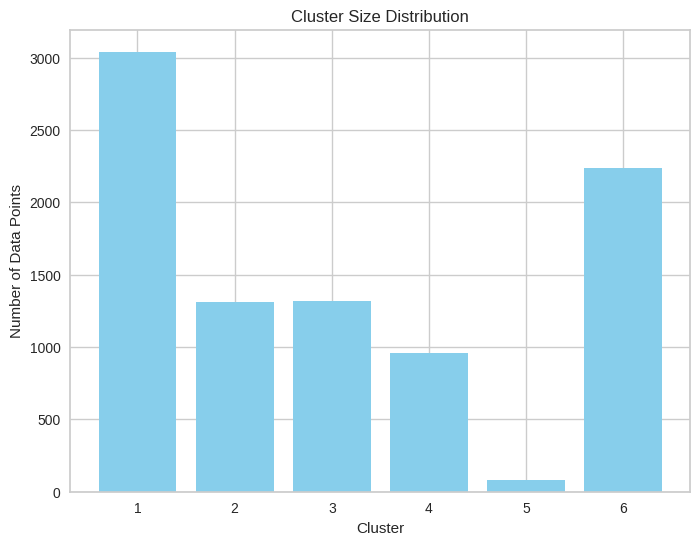

In [64]:
# Count the number of data points in each cluster
cluster_sizes = np.bincount(kmeans_model.labels_)

# Plot the cluster size distribution
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cluster_sizes) + 1), cluster_sizes, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Size Distribution')
plt.show()

We see that the size of the 5-th cluster is quite small compared to other clusters. This suggest that we might only need <= 5 cluster (the 5-th cluster is not significant).

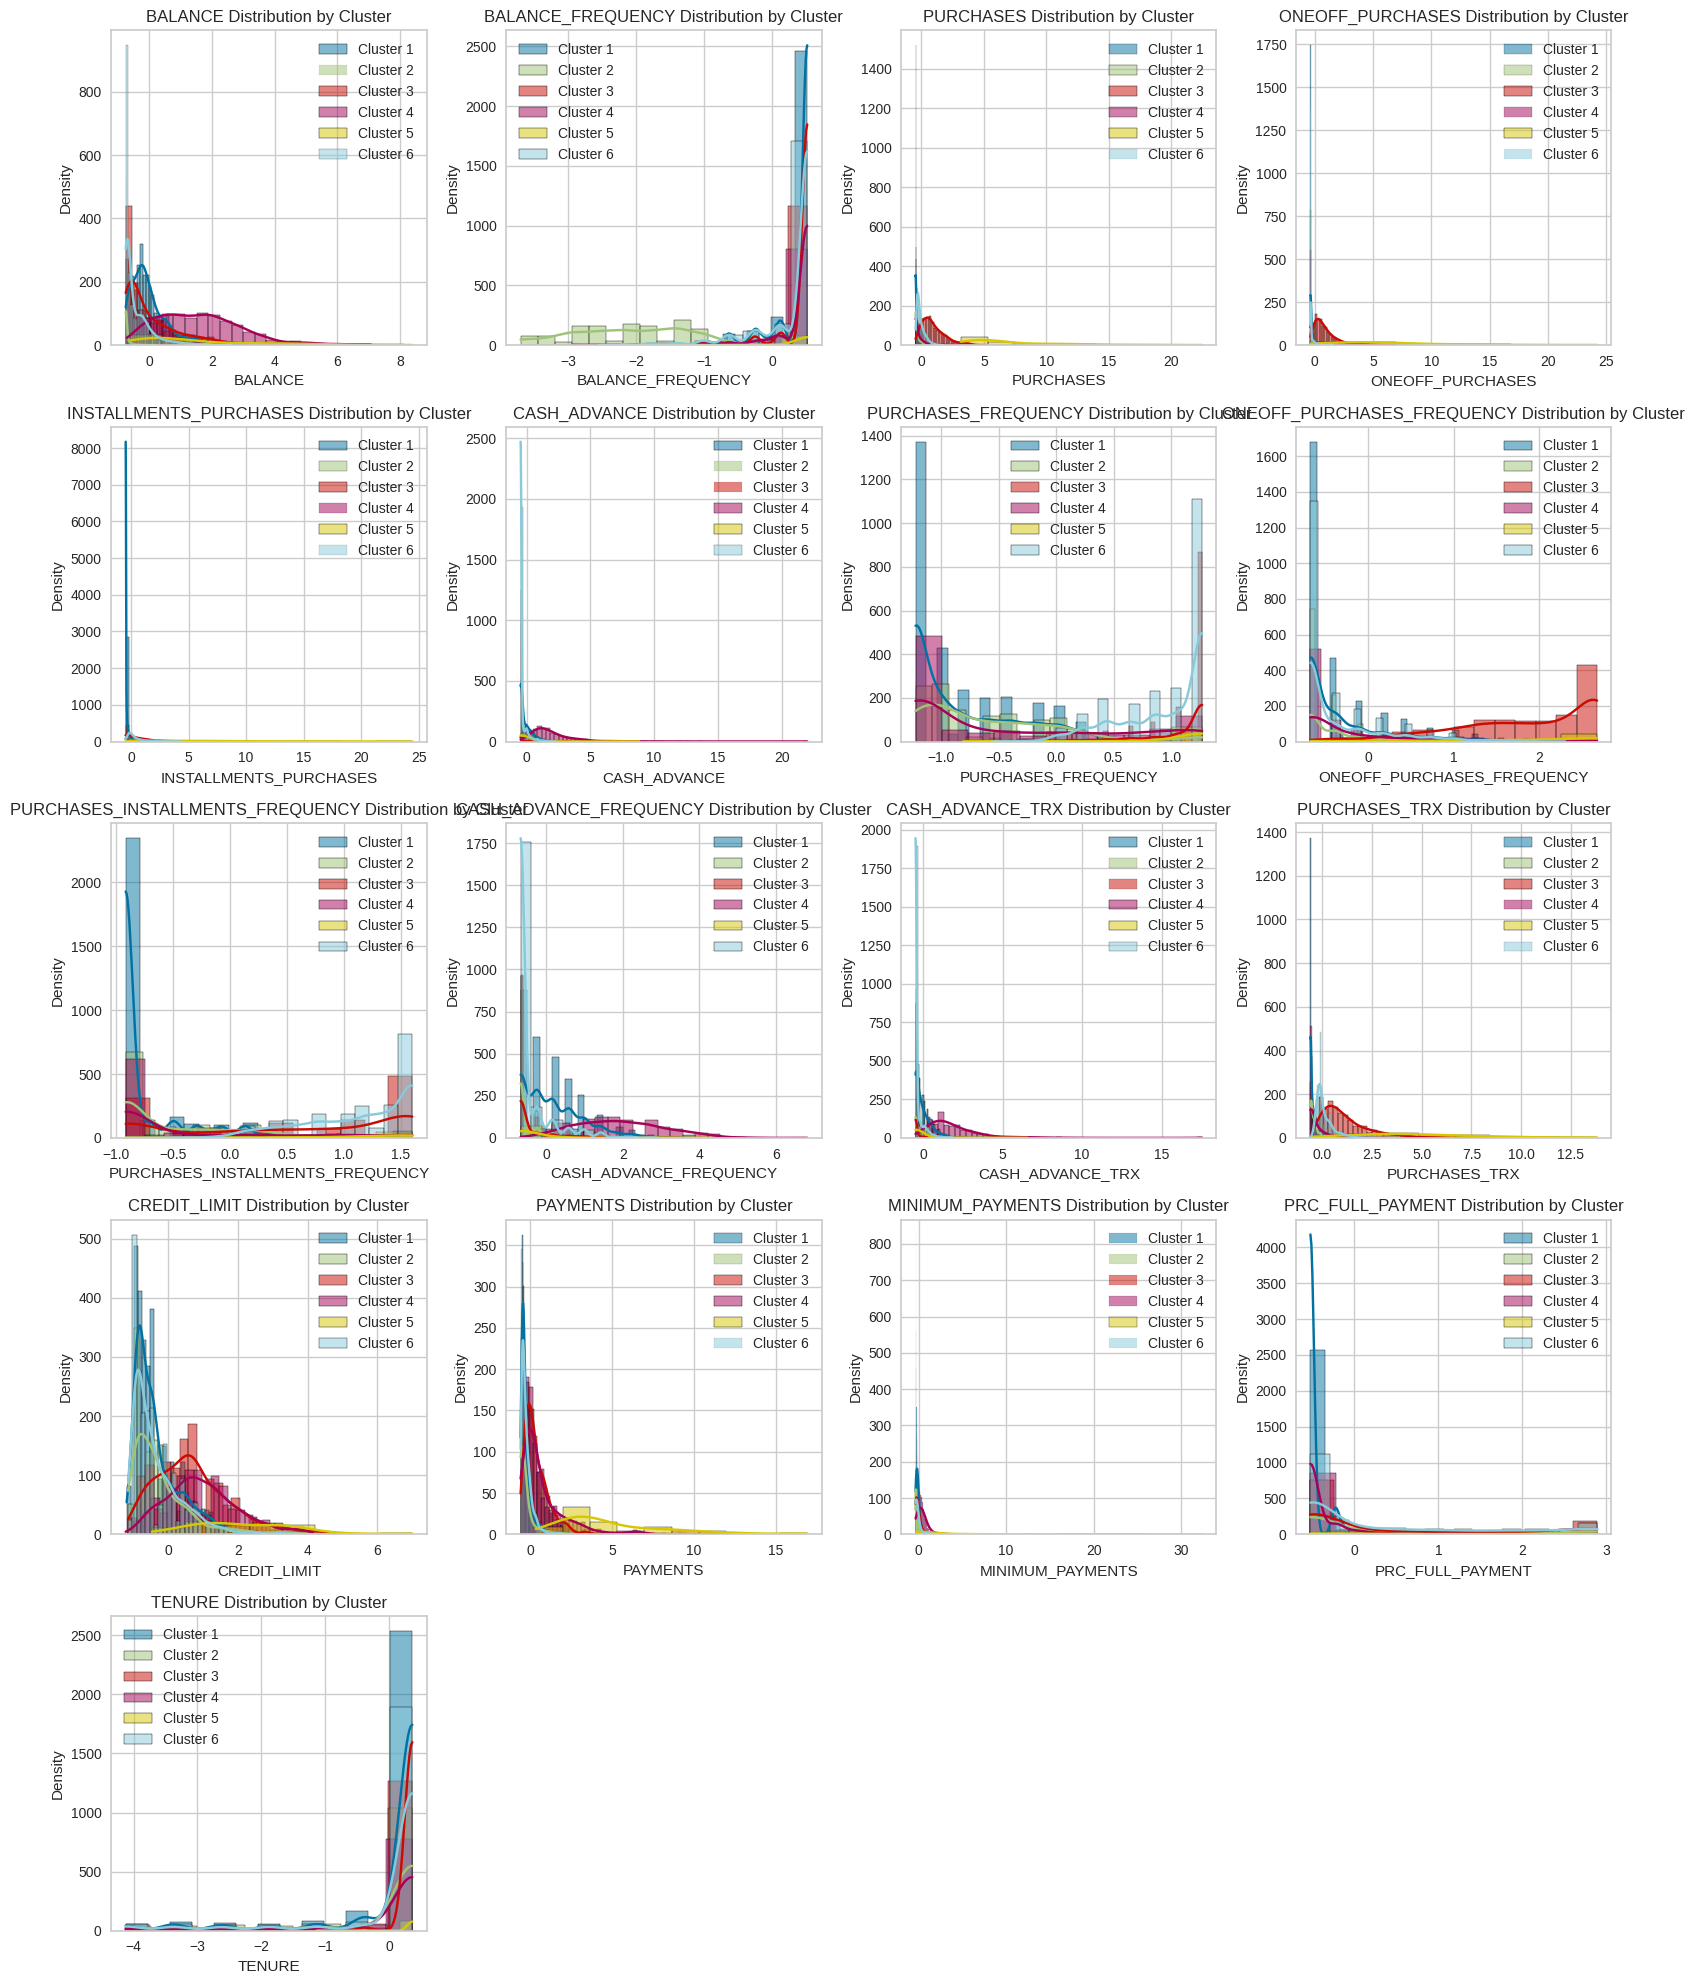

In [68]:
import math
# Concatenate the cluster labels with the original scaled data
clustered_data = pd.concat([pd.DataFrame(scaled_data, columns=data.columns), pd.Series(kmeans_model.labels_, name='cluster')], axis=1)

# Calculate the number of rows and columns for subplots based on the number of features
num_features = len(data.columns)
num_rows = math.ceil(num_features / 4)
num_cols = min(num_features, 4)

# Plot histograms plots for each feature within each cluster
plt.figure(figsize=(16, 4*num_rows))
for i, feature in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i+1)
    for cluster_label in range(6):
        sns.histplot(clustered_data[clustered_data['cluster'] == cluster_label][feature], kde=True, label=f'Cluster {cluster_label+1}', alpha=0.5)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()
